# Final Report
## Mackenzee Stout
### Date-12/6/25

My hypothesis is, which WWE event, both PLE(Premium Live Event) and weekly events, has the highest arena attendance in 2024?
<br>
The purpose of the analysis is to understand how attendance varies across different WWE events and what those patterns reveal about the company's event structures and audience behavior. The full motivation for this data is to determine which WWE live event attracts the highest fan attendance and to see what this data will tell me about WWE's overall event strategies. I also want to identify the patterns, outliers, and differences that can help explain WWE’s fan engagement and event success. The goal was to turn the numbers into a visual form that could reveal trends that might not be obvious from the long list of values. The reason why I wanted to look at this data was because I wanted to understand the structure of WWE's live audience across each live event that happens throughout the year and I wanted to compare how much more popular PLE events are to weekly events. Using this data, I am following other analysts in sports entertainment and event managment that might be using the same data for a bigger answer.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Data

For my data, I found a website called, Wrestlingdata.com, that organized different types of wresting entertainment data by different categories then into smaller sub categories. Using these different categories, I looked around the website and found which data best fit the hypothesis I thought of. I found this website to be useful because it stays up to date with recent events and it has a lot of data I could choose from for a hypothesis. Each section is very organized and easy to read. When it comes to finding this data, a lot of it can be track by how many tickets have been sold or by the size of the venue where the evnt takes place.

In [4]:
attendance = pd.read_csv(r'/Users/kenzee.stout/Data In EMAT 2025/WWE Data(Attendance).csv')
attendance.head(78)

,Month,Event,Attendance
0,April,WWE WrestleMania XL - Night 2,72755
1,April,WWE WrestleMania XL - Night 1,72543
2,August,WWE SummerSlam 2024,57791
3,February,WWE Elimination Chamber 2024,52590
4,January,WWE Royal Rumble 2024,48044
...,...,...,...
72,June,WWE RAW,6900
73,May,WWE RAW,6700
74,July,WWE RAW,6343
75,January,WWE RAW,5300


### Grouping Events and Attendance Data

In [22]:
event_attendance = attendance.groupby('Event')['Attendance'].sum()
event_attendance.head(20)

Event
WWE Backlash 2024                      11628
WWE Bad Blood 2024                     16092
WWE Bash in Berlin                     13149
WWE Clash at the Castle 2024           11200
WWE Elimination Chamber 2024           52590
WWE Friday Night Smackdown            318008
WWE Money in the Bank 2024             19885
WWE NXT                                 1850
WWE NXT Battleground 2024                700
WWE NXT Deadline 2024                   1900
WWE NXT No Mercy 2024                   7000
WWE NXT Stand & Deliver 2024           16545
WWE NXT Vengeance Day 2024              3700
WWE RAW                               350635
WWE Royal Rumble 2024                  48044
WWE Saturday Night's Main Event        15021
WWE SummerSlam 2024                    57791
WWE Survivor Series: WarGames 2024     17828
WWE WrestleMania XL - Night 1          72543
WWE WrestleMania XL - Night 2          72755
Name: Attendance, dtype: int64

For my hypothesis, I decided to find the data that shows the attendance of all the WWE events that took place in the year 2024. Once I found the data, I wasn't able to download the data so I had to convert the websites data into my own CSV file. I organized the data into 3 columns, 'Month', 'Event', and 'Attendance' and included 77 events that happended that year. Once I had the data that showed me the month and attendance of each month, I decided to group together the events and attendance so I could get the proper graph needed for my hypothesis. With this data grouped together, I can clearly see the attendance for each PLE event, like Wreslemania or Summerslam, and also see the whole attendance of the weekly shows, like Raw or Friday Night Smackdown, that took place throughtout the weeks. The final result of my raw data uses a 64-bit integer data type since most of my data is made up of whole numbers. For my final graphs, I seperated the attendance of the major PLE events and the attendance of the weekly shows so I could clearly see the difference in numbers when it comes to bigger events compared to smaller ones.

### Plot the Data

In [37]:
def ple_group(event):
    ple_keywords = [
        "WrestleMania", "SummerSlam", "Royal Rumble",
        "Survivor Series", "Money in the Bank", "Backlash",
        "Elimination Chamber", "Clash at the Castle",
        "Vengeance", "Deadline", "Stand & Deliver",
        "No Mercy", "Battleground", "Bad Blood", "Bash"
    ]
    
    for word in ple_keywords:
        if word.lower() in event.lower():
            return "PLE"
    return None  # all other events

attendance['PLE'] = attendance['Event'].apply(ple_group)
ple_events = attendance[attendance['PLE'] == "PLE"]

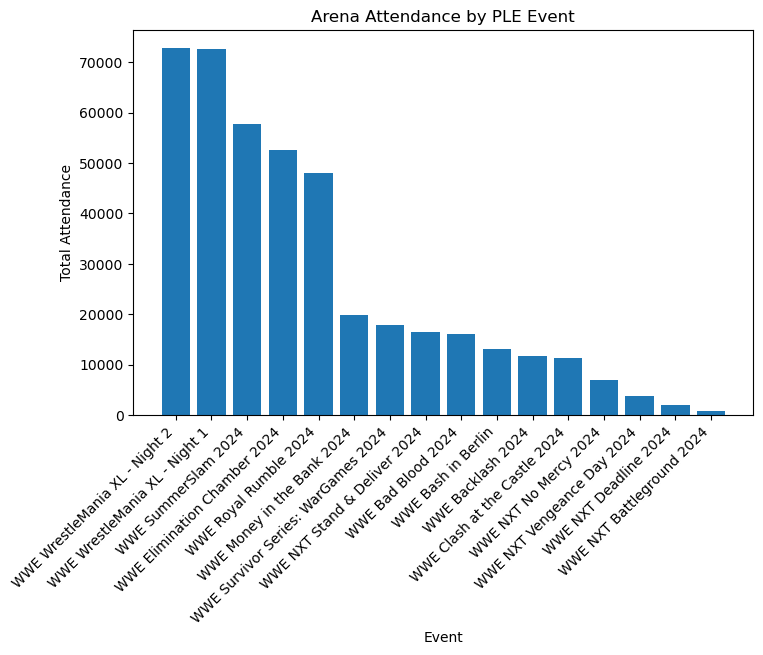

In [38]:
plt.figure(figsize=(8, 5))
plt.bar(ple_events['Event'], ple_events['Attendance'])
plt.title('Arena Attendance by PLE Event')
plt.xlabel('Event')
plt.ylabel('Total Attendance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [46]:
def weekly_group(event):
    if "RAW" in event.upper():
        return "RAW"
    elif "SmackDown" in event or "Smackdown" in event or "SMACKDOWN" in event:
        return "SmackDown"
    elif "NXT" in event.upper():
        return "NXT"
    else:
        return None  # events that are not weekly shows
        
attendance['Brand'] = attendance['Event'].apply(weekly_group)
weekly_shows = attendance[attendance['Brand'].notna()]
weekly_attendance = weekly_shows.groupby('Brand')['Attendance'].sum()

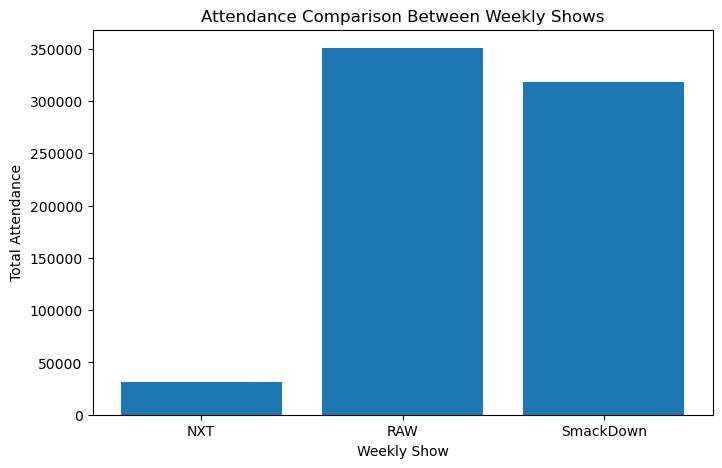

In [48]:
plt.figure(figsize=(8,5))
plt.bar(weekly_attendance.index, weekly_attendance.values)
plt.title("Attendance Comparison Between Weekly Shows")
plt.xlabel("Weekly Show")
plt.ylabel("Total Attendance")
plt.show()

### Conclusion

For the graphs, I decided to create two graphs with one showing the attendance for larger PLE events and a graph that shows the group attendance of the weekly shows throughout the year. Looking at the bar graphs, I can see that not all of the events draw the same number of attendees. When looking at the major PLE events, I can concluded that WWE Wrestlemania XL Night 1 & 2 combined, has the highest attendence count with the range being 70,000+. In contrast, with smaller events such as weekly shows, like RAW, Smackdown, and NXT, happen every week throughout the year so these events have been grouped together in the plot. Because of this, I can see all together that WWE RAW is the weekly show that has the highest attendence count with a range being 300,000+. Despite the weekly show attendance being grouped together, I can still clearly conclude that the bigger PLE events tend to attract the most fans. 
<br>
<br>
Overall, the data shows that WWE's largest annual events, such as wrestlemania or Summerslam, attract the largest crowds, while smaller weekly shows tend to attract fewer attendees. This supports that event size and importance can strongly affect the turnout of events. Some next steps that I could take that could improve my analysis would be asking questions like, how do ticket prices compare between events or do cities/venues affect attendance? These questions could help me deepen my analysis and determine how these questions might change the results. One of the main limitaions my data has was that it was only looking at the year of 2024. Every year these attendance numbers could increase or decrease depending on the event. I also decided to focus only on WWE events, showing that if I would have included other wrestling companies such as AEW or ECW, it could have changed the end result of my data. The audience of the data should understand that Wrestlemania is consistently WWE's biggest event, both in popularity and attendance, while smaller weekly events still hold value to fans, they don't seem fill venues on the same level as bigger events.